<span style="font-size: 38px; color: red; font-weight: bold;">News Article Classification</span> 

<h1>Overview</h1>

In today’s digital world, news articles are constantly being generated and shared across
different platforms. For news organizations, social media platforms, and aggregators,
classifying articles into specific categories such as sports, politics, and technology can help
improve content management and recommendation systems. This project aims to develop a
machine learning model that can classify news articles into predefined categories, such as
sports, politics, and technology, based on their content.
By automating this process, organizations can efficiently categorize large volumes of news
articles, making it easier for readers to access relevant information based on their interests.

<h1>Problem Statement</h1>

The primary objective of this project is to build a classification model that can automatically categorize news articles into different predefined categories. The model will be trained using a labeled dataset of news articles and will output the most likely category (e.g., sports, politics, or technology) for any given article.

The goal is to:

- Develop a robust classifier capable of handling articles from multiple categories.
- Preprocess the text data, extract meaningful features, and train models to classify the articles.
- Evaluate the model performance and provide actionable insights on how well it classifies articles.


<span style="font-size: 38px; color: blue; font-weight: bold;">DATA COLLECTION</span>

<h1>Importing Dataset</h1>

In [19]:
import pandas as pd
import numpy as np

#import the dataset 
df = pd.read_csv(r"C:\Users\aryan\Desktop\INTERNSHALA\COURSE 7\COURSE 7 PROJECT\PART B\data_news - data_news.csv")

#display the first 5 rows for reference
df.head()


category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                             keywords  
0                     running-lessons  
1           talking-to-yourself-crazy  
2  crenezumab-alzheimers-disease-drug  
3                     meaningful-life  
4                    green-superfoods

<H1>Checking for Null values</H1>

In [20]:
df.isnull().sum()

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64

<h1>Handling Missing values</h1>

In [21]:
#the column "keywords" contains 2668 missing values

#the missing values are replaced by an empty string
df['keywords'] = df['keywords'].fillna('')


<h1>Dropping unnecessary columns</h1>

In [22]:
#since the "links" column in the dataset holds no value that can contribute towards classification, it is dropped
df.drop(columns=['links'], inplace=True)


<span style="font-size: 38px; color: blue; font-weight: bold;">DATA PREPROCESSING</span> 

In [25]:
import re
from bs4 import BeautifulSoup

#function to clean the text  
def clean_text_for_eda(text):
    if not isinstance(text, str):
        return ''

    #removes any html tags in the text 
    text = BeautifulSoup(text, "html.parser").get_text()

    #converts text to lower case
    text = text.lower()

    #replaces the "-" in text with " ", this is done because the "keywords" column contains words separated by "-"
    text = text.replace('-', ' ')  
    
    #removes punctuation and digits 
    text = re.sub(r'[^a-z\s]', '', text)  
    
    #removes unnecessary spaces
    return text.strip()



#the function is applied to the columns - "headline", "short-description" and "keywords"
df['headline'] = df['headline'].apply(clean_text_for_eda)
df['short_description'] = df['short_description'].apply(clean_text_for_eda)
df['keywords'] = df['keywords'].fillna('').apply(clean_text_for_eda)

#combining the three columns (useful for future tasks such as vectorization and model training)
df['combined_text'] = df['headline'] + ' ' + df['short_description'] + ' ' + df['keywords']


<h1>Data Preprocessing: Methodology</h1>

1. **A custom function named `clean_text_for_eda`** was used to preprocess the text data. This function performs the following steps:
   - Removes HTML tags using `BeautifulSoup`.
   - Converts text to lowercase to ensure consistency.
   - Replaces hyphens (`-`) with spaces, which is especially useful for the `keywords` column.
   - Removes punctuation and digits using regular expressions.
   - Strips extra whitespace from the text.

2. **The function was applied to the following columns:**
   - `headline`
   - `short_description`
   - `keywords`

3. **These cleaned columns were then combined into a new column** called `combined_text`, providing a unified text field for each article.

<h1>Data Preprocessing: Insight</h1>

Preprocessing ensured uniform formatting and removed irrelevant characters, resulting in cleaner data. The `combined_text` column creates a consolidated view of the article content, which is useful for further steps like feature extraction and model training.




<span style="font-size: 38px; color: blue; font-weight: bold;">EXPLORATORY DATA ANALYSIS</span>

<h1>Class Distribution</h1>

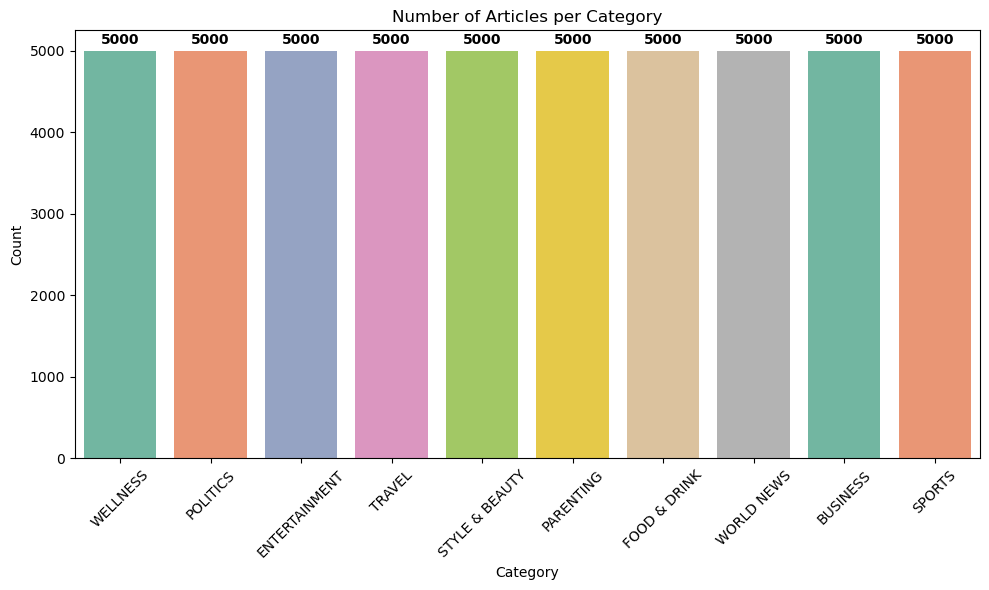

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#count the number of articles per category 
category_counts = df['category'].value_counts()

#plot the barchart 
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title("Number of Articles per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)

#adding data labels to the bars 
for i, value in enumerate(category_counts.values):
    ax.text(i, value + max(category_counts.values) * 0.01, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


<h1>Text Length Analysis</h1>

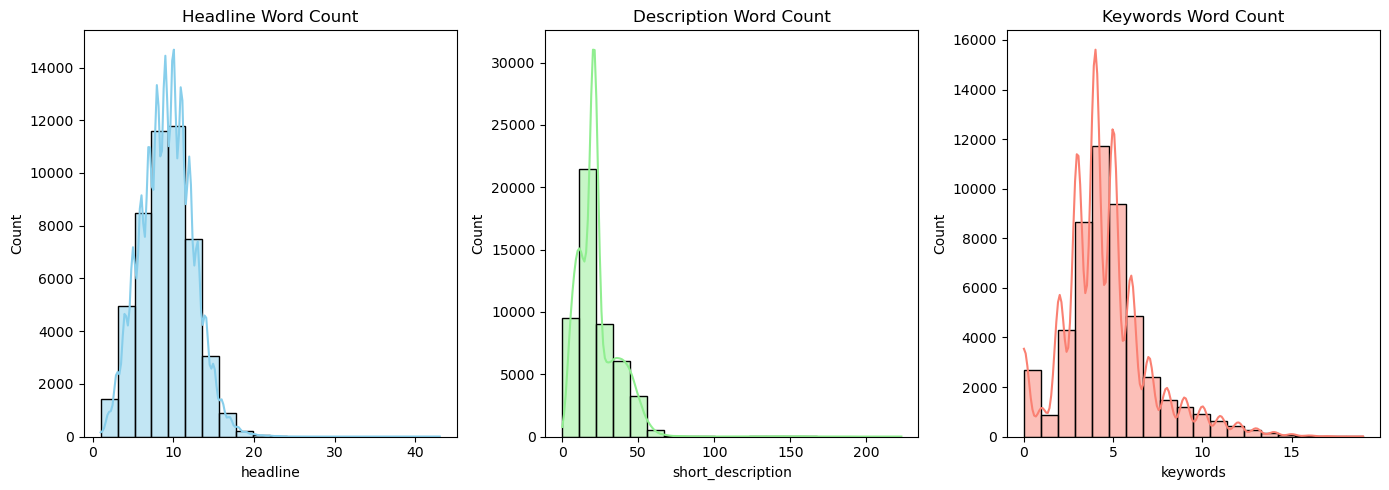

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#calculate the lengths for each column
headline_lens = df['headline'].apply(lambda x: len(str(x).split()))
desc_lens = df['short_description'].apply(lambda x: len(str(x).split()))
keyword_lens = df['keywords'].fillna("").apply(lambda x: len(str(x).replace("-", " ").split()))

#plotting histograms for the different columns
plt.figure(figsize=(14, 5))

#Headline length
plt.subplot(1, 3, 1)
sns.histplot(headline_lens, bins=20, kde=True, color='skyblue')
plt.title("Headline Word Count")

#Description length
plt.subplot(1, 3, 2)
sns.histplot(desc_lens, bins=20, kde=True, color='lightgreen')
plt.title("Description Word Count")

#Keywords length
plt.subplot(1, 3, 3)
sns.histplot(keyword_lens, bins=20, kde=True, color='salmon')
plt.title("Keywords Word Count")

plt.tight_layout()
plt.show()


<h1>Top Words per Category</h1>

In [38]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#initialize stopwords
stop_words = set(stopwords.words('english'))

#function to get the top words from each category 
def get_top_words_from_combined_text(df, category_name, top_n=5):
    #Filter rows by category
    subset = df[df['category'] == category_name]
    
    #Join all combined text entries into one large string
    text = ' '.join(subset['combined_text'].astype(str))
    
    #Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    #Count and return top N
    word_counts = Counter(tokens)
    return word_counts.most_common(top_n)

#declaring a list of categories in the dataset 
categories_to_check = ['WELLNESS', 'POLITICS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 
                       'PARENTING', 'FOOD & DRINK', 'WORLD NEWS', 'BUSINESS', 'SPORTS']

#initialize an empty list to store the results
results = []

#loop through each category and collect the top words
for cat in categories_to_check:
    top_words = get_top_words_from_combined_text(df, cat)
    # Extract the words and join them into a comma-separated string
    top_words_str = ', '.join([word for word, _ in top_words])
    results.append([cat, top_words_str])

#convert the results into a dataframe
top_words_df = pd.DataFrame(results, columns=['Category', 'Top 5 Words'])

#display the DataFrame
top_words_df




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Category                         Top 5 Words
0        WELLNESS      health, life, us, time, people
1        POLITICS        us, new, clinton, gop, obama
2   ENTERTAINMENT         new, star, film, one, movie
3          TRAVEL    travel, photos, best, new, world
4  STYLE & BEAUTY   photos, style, fashion, week, new
5       PARENTING  kids, parents, children, baby, one
6    FOOD & DRINK   recipes, food, recipe, best, make
7      WORLD NEWS      us, people, attack, new, korea
8        BUSINESS    business, new, women, us, people
9          SPORTS    game, nfl, football, first, team

<h1>Wordcloud for each Category</h1>

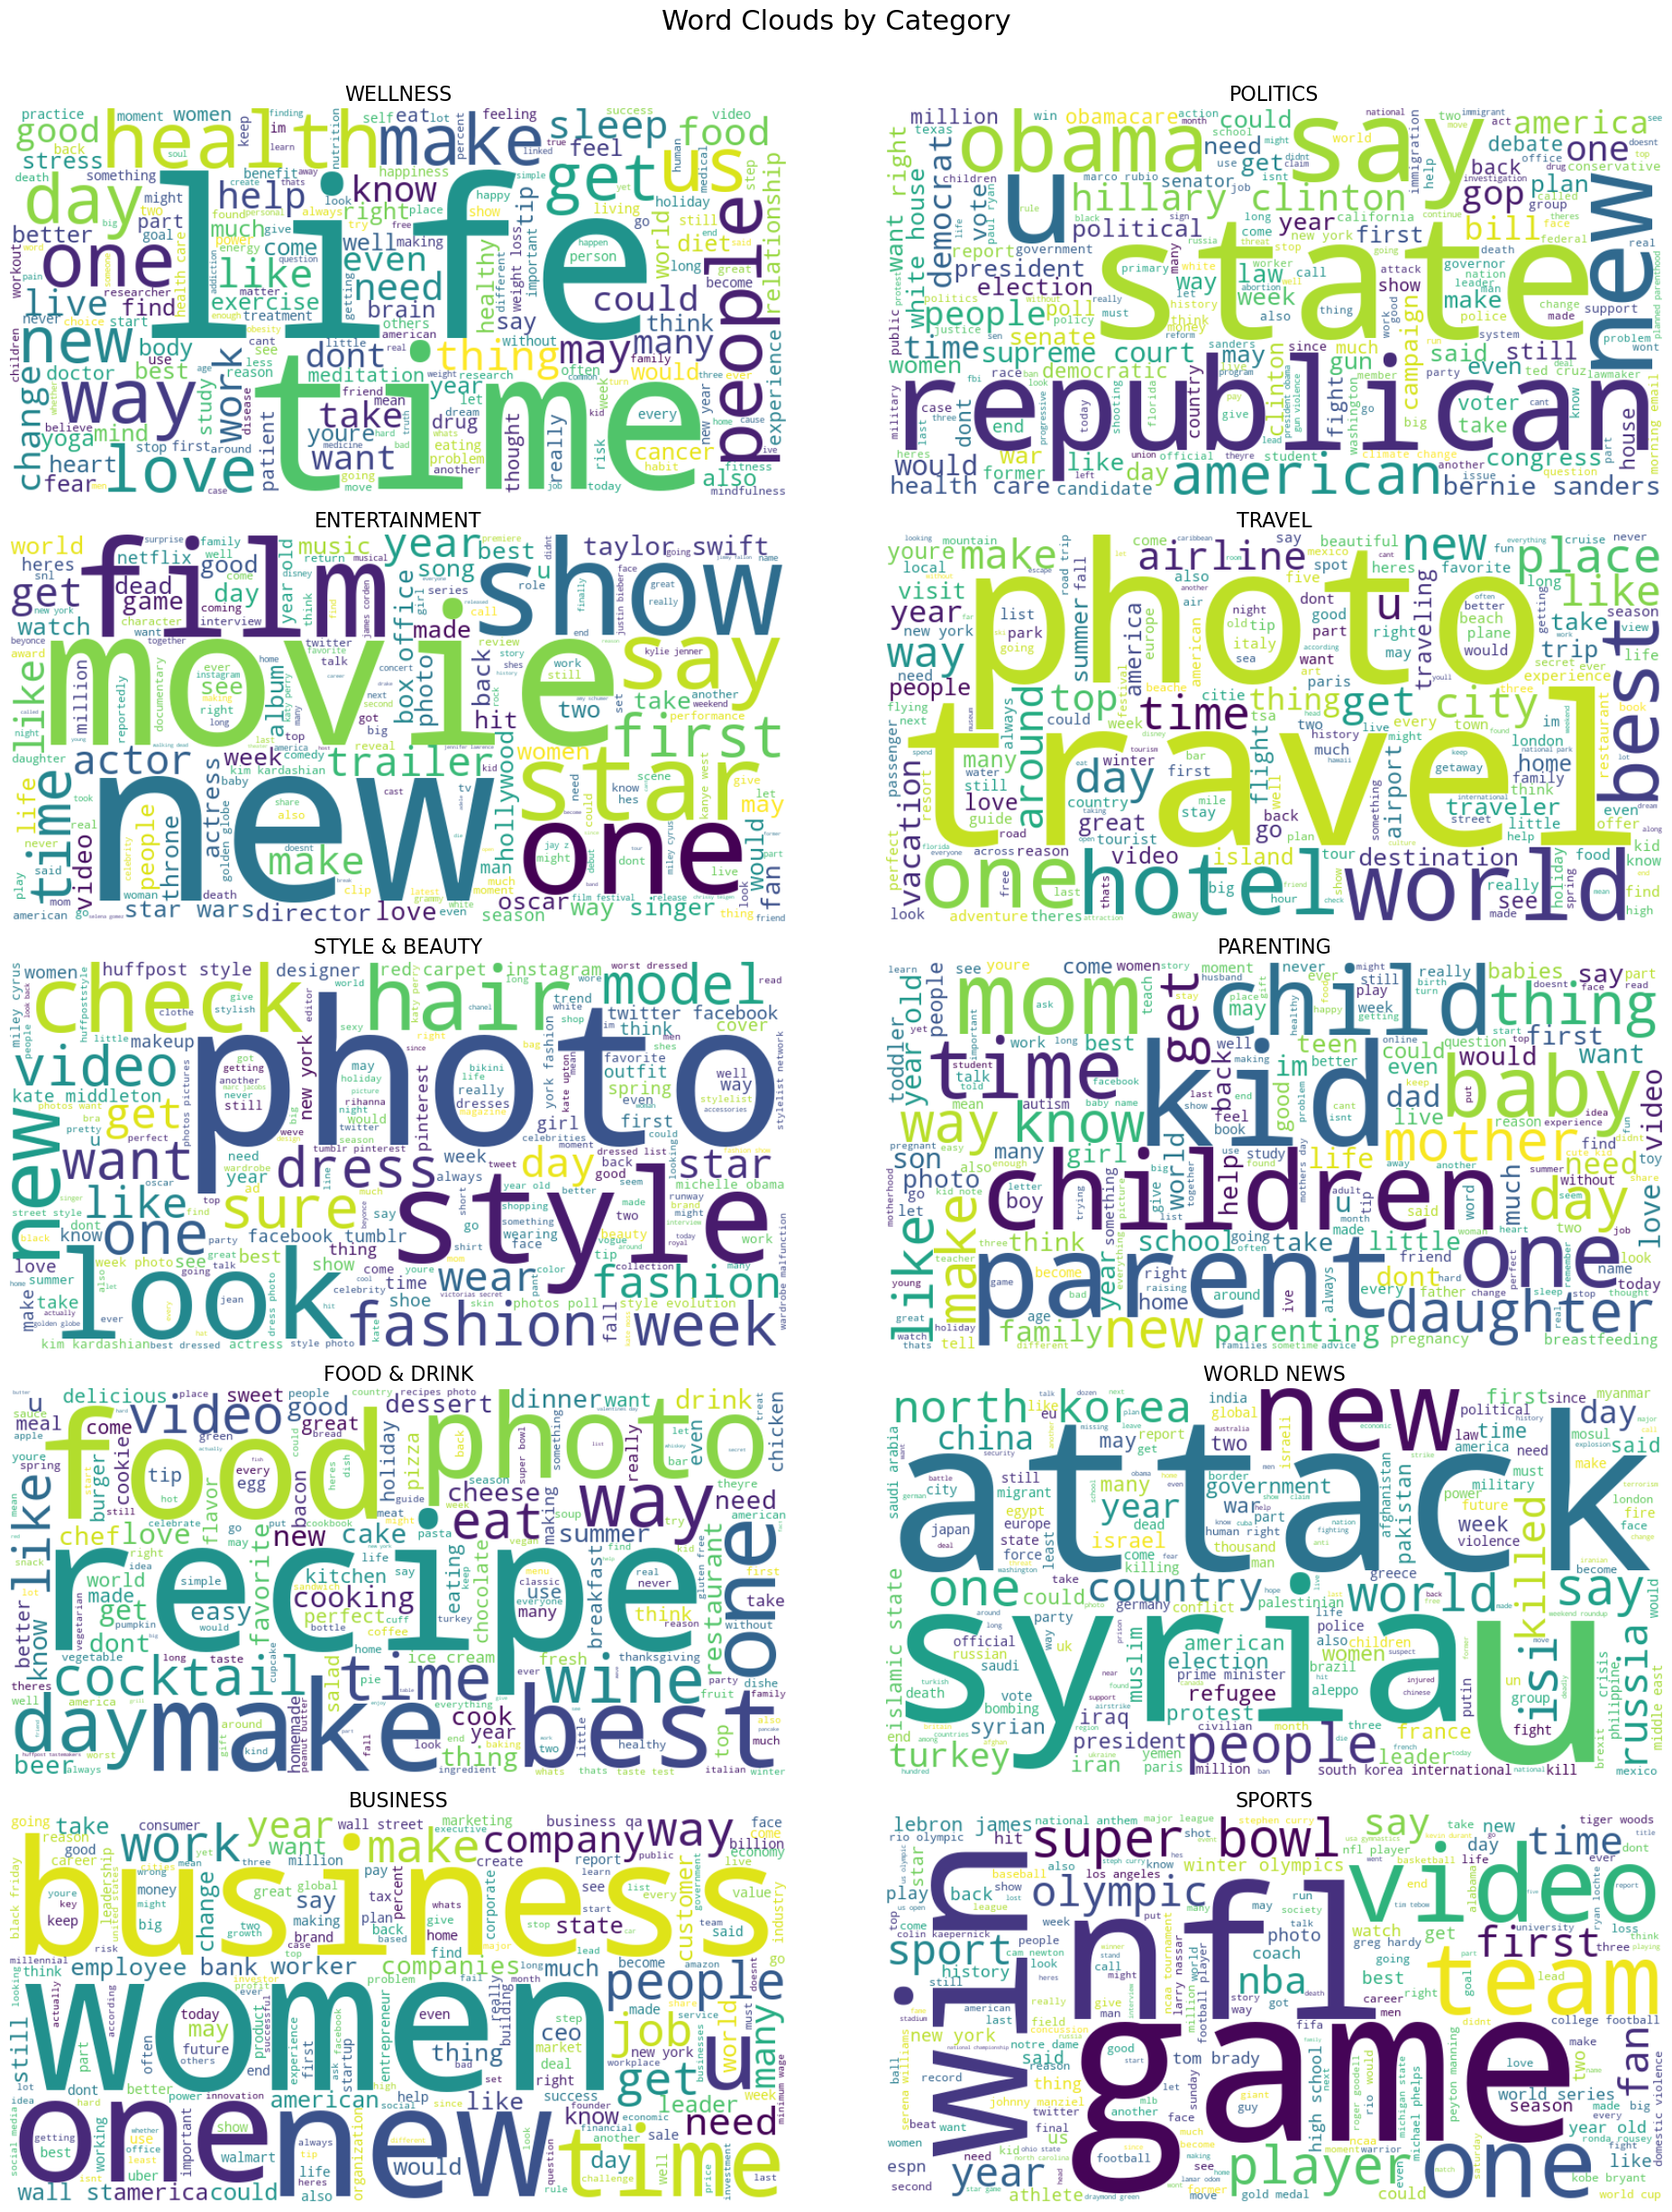

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#List of categories
categories_to_check = ['WELLNESS', 'POLITICS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 
                       'PARENTING', 'FOOD & DRINK', 'WORLD NEWS', 'BUSINESS', 'SPORTS']

#Set up the subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
fig.suptitle('Word Clouds by Category', fontsize=22)
axes = axes.flatten()

for idx, category_name in enumerate(categories_to_check):
    #Filter rows by category
    subset = df[df['category'] == category_name]
    
    #Combine all text into a single string
    text = ' '.join(subset['combined_text'].astype(str))
    
    #Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    
    #Plot the word cloud in the corresponding subplot
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(category_name, fontsize=16)
    axes[idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the suptitle
plt.show()


<h1>EDA: Insights</h1>

# 1. Class Distribution
- The dataset is **perfectly balanced**, with **5000 articles** in each of the 10 categories (WELLNESS, POLITICS, ENTERTAINMENT, TRAVEL, STYLE & BEAUTY, PARENTING, FOOD & DRINK, WORLD NEWS, BUSINESS, and SPORTS).
- **Balanced class distribution** ensures that the model does not favor one category over another, preventing any bias that might otherwise skew the predictions.
- This balance simplifies the training process, making the model less sensitive to class imbalances, and **improves the generalization** of the model across different categories.
- It also enables **fair evaluation** of the model, as each category will contribute equally to performance metrics (e.g., accuracy, F1-score, precision, recall).
- During training, the model will have an equal opportunity to learn patterns from each category, which is crucial for **classification tasks** where each class is expected to be represented fairly in predictions.

# 2. Text Length Analysis

## 2.1. Headline Word Count
- The average headline length is around **9.24 words**, with the majority of headlines falling between **7 and 11 words**.
- This suggests that headlines tend to be short and to the point, with a few articles featuring longer, more detailed headlines. These variations can influence how the model will interpret headlines, requiring appropriate feature extraction methods for text classification.

## 2.2. Description Word Count
- The description's average word count is **22.93 words**, but it varies widely (from **0 to 223 words**). This shows that while some articles may have concise descriptions, others may go into much more detail.
- Given the high standard deviation of **13.59**, there is a broad range in how descriptions are written, which could challenge the model to identify important patterns across varying lengths of text.

## 2.3. Keyword Word Count
- Keywords have an average length of **4.52 words**, with most articles having between **3 and 5 keywords**.
- A significant portion of articles may have no keywords at all (as indicated by the minimum of **0**), which could potentially lead to missing metadata. The spread suggests that keyword extraction could be a useful feature in the modeling process, but it's essential to account for missing or sparsely populated keywords in the dataset.

# 3. Top Words per Category

- **WELLNESS**: The top words include "health," "life," "us," "time," and "people," emphasizing a focus on personal well-being, lifestyle, and societal issues surrounding health.
- **POLITICS**: Common words such as "us," "new," "clinton," "gop," and "obama" indicate a political discourse centered around US politics, with frequent mentions of political figures and parties. It suggests that political content is highly focused on current events and key political figures.
- **ENTERTAINMENT**: Words like "new," "star," "film," "one," and "movie" highlight a strong entertainment focus on popular culture, particularly movies, stars, and the film industry.
- **TRAVEL**: The recurring words "travel," "photos," "best," "new," and "world" suggest a category centered around travel experiences, destination recommendations, and visual content, showcasing a strong interest in global travel.
- **STYLE & BEAUTY**: "Photos," "style," "fashion," "week," and "new" dominate this category, pointing to an emphasis on fashion trends, style advice, and the latest beauty updates.
- **PARENTING**: Keywords such as "kids," "parents," "children," "baby," and "one" indicate content related to family, parenting tips, and child development, with a focus on practical advice for parents.
- **FOOD & DRINK**: With top words like "recipes," "food," "recipe," "best," and "make," this category focuses on culinary content, including recipes, cooking tips, and food trends.
- **WORLD NEWS**: Words like "us," "people," "attack," "new," and "korea" suggest global news stories, particularly those that involve international events, geopolitical tensions, and human interest topics.
- **BUSINESS**: The words "business," "new," "women," "us," and "people" reflect content focused on business news, social issues like gender equality, and the latest trends in the corporate world.
- **SPORTS**: Common words include "game," "nfl," "football," "first," and "team," reflecting a focus on sports, especially football, with an emphasis on team sports and game results.



<span style="font-size: 38px; color: blue; font-weight: bold;">FEATURE EXTRACTION</span>

<H1>Tokenization, Stopword Removal and Lemmatization</H1>

In [46]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#function to perform tokenization, lemmatization and remove stopwords 
def preprocess_text(text):
    #tokenize the text into words
    tokens = word_tokenize(text)
    
    #remove punctuation and stopwords, and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word not in stop_words and word not in string.punctuation]
    
    return ' '.join(tokens)

#apply preprocessing function to 'combined_text' column
df['processed_text'] = df['combined_text'].apply(preprocess_text)

#display a sample of the processed text
df['processed_text'].head()






[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    mile day lesson learned resting part training ...
1    talking crazy crazy helpful think talking tool...
2    crenezumab trial gauge whether alzheimers drug...
3    oh difference made want busy keep trying perfe...
4    green superfoods first bad news soda bread cor...
Name: processed_text, dtype: object

<h1>Train Test Split</h1>

In [48]:
from sklearn.model_selection import train_test_split

#define the features and target for train test split
X = df['processed_text']
y = df['category']

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<h1>TF-IDF Vectorization</h1>

In [49]:
#TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

<H1>Feature Extraction: Methodology</H1>

### 1) **Tokenization, Stopword Removal, Lemmatization:**
- **Tokenization:** The process starts by breaking down the text into individual words (tokens). This allows the model to understand each word as a separate entity.
- **Stopword Removal:** Common words like "the", "is", "in", etc., which don't contribute much to meaning, are removed. This helps focus on the important words that define the content.
- **Lemmatization:** The words are reduced to their base or root form (e.g., "running" becomes "run"). This ensures that different forms of a word are treated as the same.

  **Application:** The `preprocess_text()` function is applied to the 'combined_text' column in the dataset. This preprocesses each text entry by tokenizing, removing stopwords, and lemmatizing the remaining tokens.

### 2) **Train-Test Split:**
- The dataset is split into two parts: 80% for training and 20% for testing. This is done to evaluate the model’s performance on unseen data.
- The split is **stratified**, meaning the proportion of categories is preserved in both training and test sets, ensuring a balanced representation.

### 3) **TF-IDF Vectorization:**
- **TF-IDF:** The `TfidfVectorizer` converts the processed text into numerical features, where each word’s importance is determined by its frequency in a document (TF) and how rare it is across all documents (IDF).
- Only the top 5000 features (most important words) are kept.
- The training data is transformed using `fit_transform()`, and the test data is transformed using `transform()`, ensuring that the model does not "leak" information from the test set during training.




<h1>Feature Extraction: Insights</h1>

### 1) **Tokenization, Stopword Removal, Lemmatization:**
- **Tokenization:** Breaks text into words, allowing the model to analyze individual terms.
- **Stopword Removal:** Removes common words that don't add value, helping the model focus on meaningful content.
- **Lemmatization:** Reduces words to their base forms (e.g., "running" becomes "run"), ensuring consistency and reducing complexity.

After processing, the text is cleaner and more relevant, leading to better model performance.

### 2) **Train-Test Split:**
- The train-test split ensures the model is trained on one subset and tested on another, preventing overfitting.
- Stratification ensures balanced representation of categories in both sets, leading to reliable evaluation.

### 3) **TF-IDF Vectorization:**
- **TF-IDF** transforms text into numerical features, focusing on important words based on frequency and rarity.
- Limiting to the top 5000 words reduces dimensionality and improves computational efficiency.
- Separate transformations for training and testing prevent data leakage and give accurate evaluation.


<span style="font-size: 38px; color: blue; font-weight: bold;">MODEL DEVELOPMENT</span>

<H1>LOGISTIC REGRESSION </H1>

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#define the hyperparameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers to try 
}

#initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

#perform GridSearchCV
logreg_grid_search = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=3, n_jobs=-1, verbose=2)
logreg_grid_search.fit(X_train_tfidf, y_train)

#best model and parameters
best_logreg_model = logreg_grid_search.best_estimator_
best_logreg_params = logreg_grid_search.best_params_
best_logreg_score = logreg_grid_search.best_score_

#display results
print("Best Logistic Regression Parameters:", best_logreg_params)
print("Best Logistic Regression Score:", best_logreg_score)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Logistic Regression Parameters: {'C': 1, 'solver': 'saga'}
Best Logistic Regression Score: 0.8089499597621934


<H1>NAIVE BAYES</H1>

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

#define the hyperparameter grid for Naive Bayes
nb_param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 5]  #smoothing parameter
}

#initialize Naive Bayes model
nb = MultinomialNB()

#perform GridSearchCV
nb_grid_search = GridSearchCV(estimator=nb, param_grid=nb_param_grid, cv=3, n_jobs=-1, verbose=2)
nb_grid_search.fit(X_train_tfidf, y_train)

#best model and parameters
best_nb_model = nb_grid_search.best_estimator_
best_nb_params = nb_grid_search.best_params_
best_nb_score = nb_grid_search.best_score_

#display results
print("Best Naive Bayes Parameters:", best_nb_params)
print("Best Naive Bayes Score:", best_nb_score)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Naive Bayes Parameters: {'alpha': 1}
Best Naive Bayes Score: 0.7963749603714594


<H1>RANDOM FOREST</H1>

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#define the hyperparameter grid for Random Forest (smaller grid)
rf_param_grid = {
    'n_estimators': [100, 150],  # Reduced number of trees
    'max_depth': [10, 20],  # Limited maximum depth values
    'min_samples_split': [2, 5]  # Reduced min samples split
}

#initialize Random Forest model
rf = RandomForestClassifier()

#perform GridSearchCV with fewer folds (cv=2)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_tfidf, y_train)

#best model and parameters
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

#display results
print("Best Random Forest Parameters:", best_rf_params)
print("Best Random Forest Score:", best_rf_score)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best Random Forest Score: 0.6429500770517613


<H1>SUPPORT VECTOR MACHINE</H1>

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#define the hyperparameter grid for SVM
svm_param_grid = {
    'C': [1, 10],  # Regularization parameter
    'kernel': ['linear'],  # Kernels to try
}

#initialize SVM model
svm = SVC()

#perform GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=3, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train_tfidf, y_train)

#best model and parameters
best_svm_model = svm_grid_search.best_estimator_
best_svm_params = svm_grid_search.best_params_
best_svm_score = svm_grid_search.best_score_

#display results
print("Best SVM Parameters:", best_svm_params)
print("Best SVM Score:", best_svm_score)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best SVM Parameters: {'C': 1, 'kernel': 'linear'}
Best SVM Score: 0.8034499478806154


<h1>Model Development: Insights</h1>

### 1) **Logistic Regression:**
- **Best Hyperparameters:** `C=1`, `solver='saga'`
- **Best Score:** 80.89%
- **Insight:** The model performs well with a moderate regularization strength (`C=1`) and the `'saga'` solver, which handles large datasets efficiently.

### 2) **Naive Bayes:**
- **Best Hyperparameters:** `alpha=1`
- **Best Score:** 79.64%
- **Insight:** The Naive Bayes model, optimized with an `alpha` of 1 (for smoothing), performs similarly to Logistic Regression but slightly lower in terms of accuracy.

### 3) **Random Forest:**
- **Best Hyperparameters:** `n_estimators=150`, `max_depth=20`, `min_samples_split=2`
- **Best Score:** 64.30%
- **Insight:** While Random Forest performed well in hyperparameter optimization, it lags behind the other models in accuracy, suggesting it may require further tuning or may not be ideal for this dataset.

### 4) **Support Vector Machine (SVM):**
- **Best Hyperparameters:** `C=1`, `kernel='linear'`
- **Best Score:** 80.34%
- **Insight:** The SVM with a linear kernel performs similarly to Logistic Regression, suggesting it's well-suited for this type of classification task, with only slight improvements over Naive Bayes.



<span style="font-size: 38px; color: blue; font-weight: bold;">MODEL EVALUATION</span>

<h1>CLASSIFICATION REPORT</h1>

In [57]:
from sklearn.metrics import classification_report

#Logistic Regression Model 
y_pred_logreg = best_logreg_model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


#Naive Bayes model 
y_pred_nb = best_nb_model.predict(X_test_tfidf)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


#Random Forest model 
y_pred_rf = best_rf_model.predict(X_test_tfidf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


#SVM model 
y_pred_svm = best_svm_model.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))




Logistic Regression Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.76      0.77      0.76      1000
 ENTERTAINMENT       0.78      0.81      0.79      1000
  FOOD & DRINK       0.86      0.88      0.87      1000
     PARENTING       0.79      0.79      0.79      1000
      POLITICS       0.78      0.76      0.77      1000
        SPORTS       0.90      0.90      0.90      1000
STYLE & BEAUTY       0.89      0.83      0.86      1000
        TRAVEL       0.82      0.80      0.81      1000
      WELLNESS       0.76      0.78      0.77      1000
    WORLD NEWS       0.82      0.81      0.81      1000

      accuracy                           0.81     10000
     macro avg       0.81      0.81      0.81     10000
  weighted avg       0.81      0.81      0.81     10000

Naive Bayes Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.76      0.72      0.74      1000
 ENTERTAINMENT       0

<H1>CONFUSION MATRIX</H1>

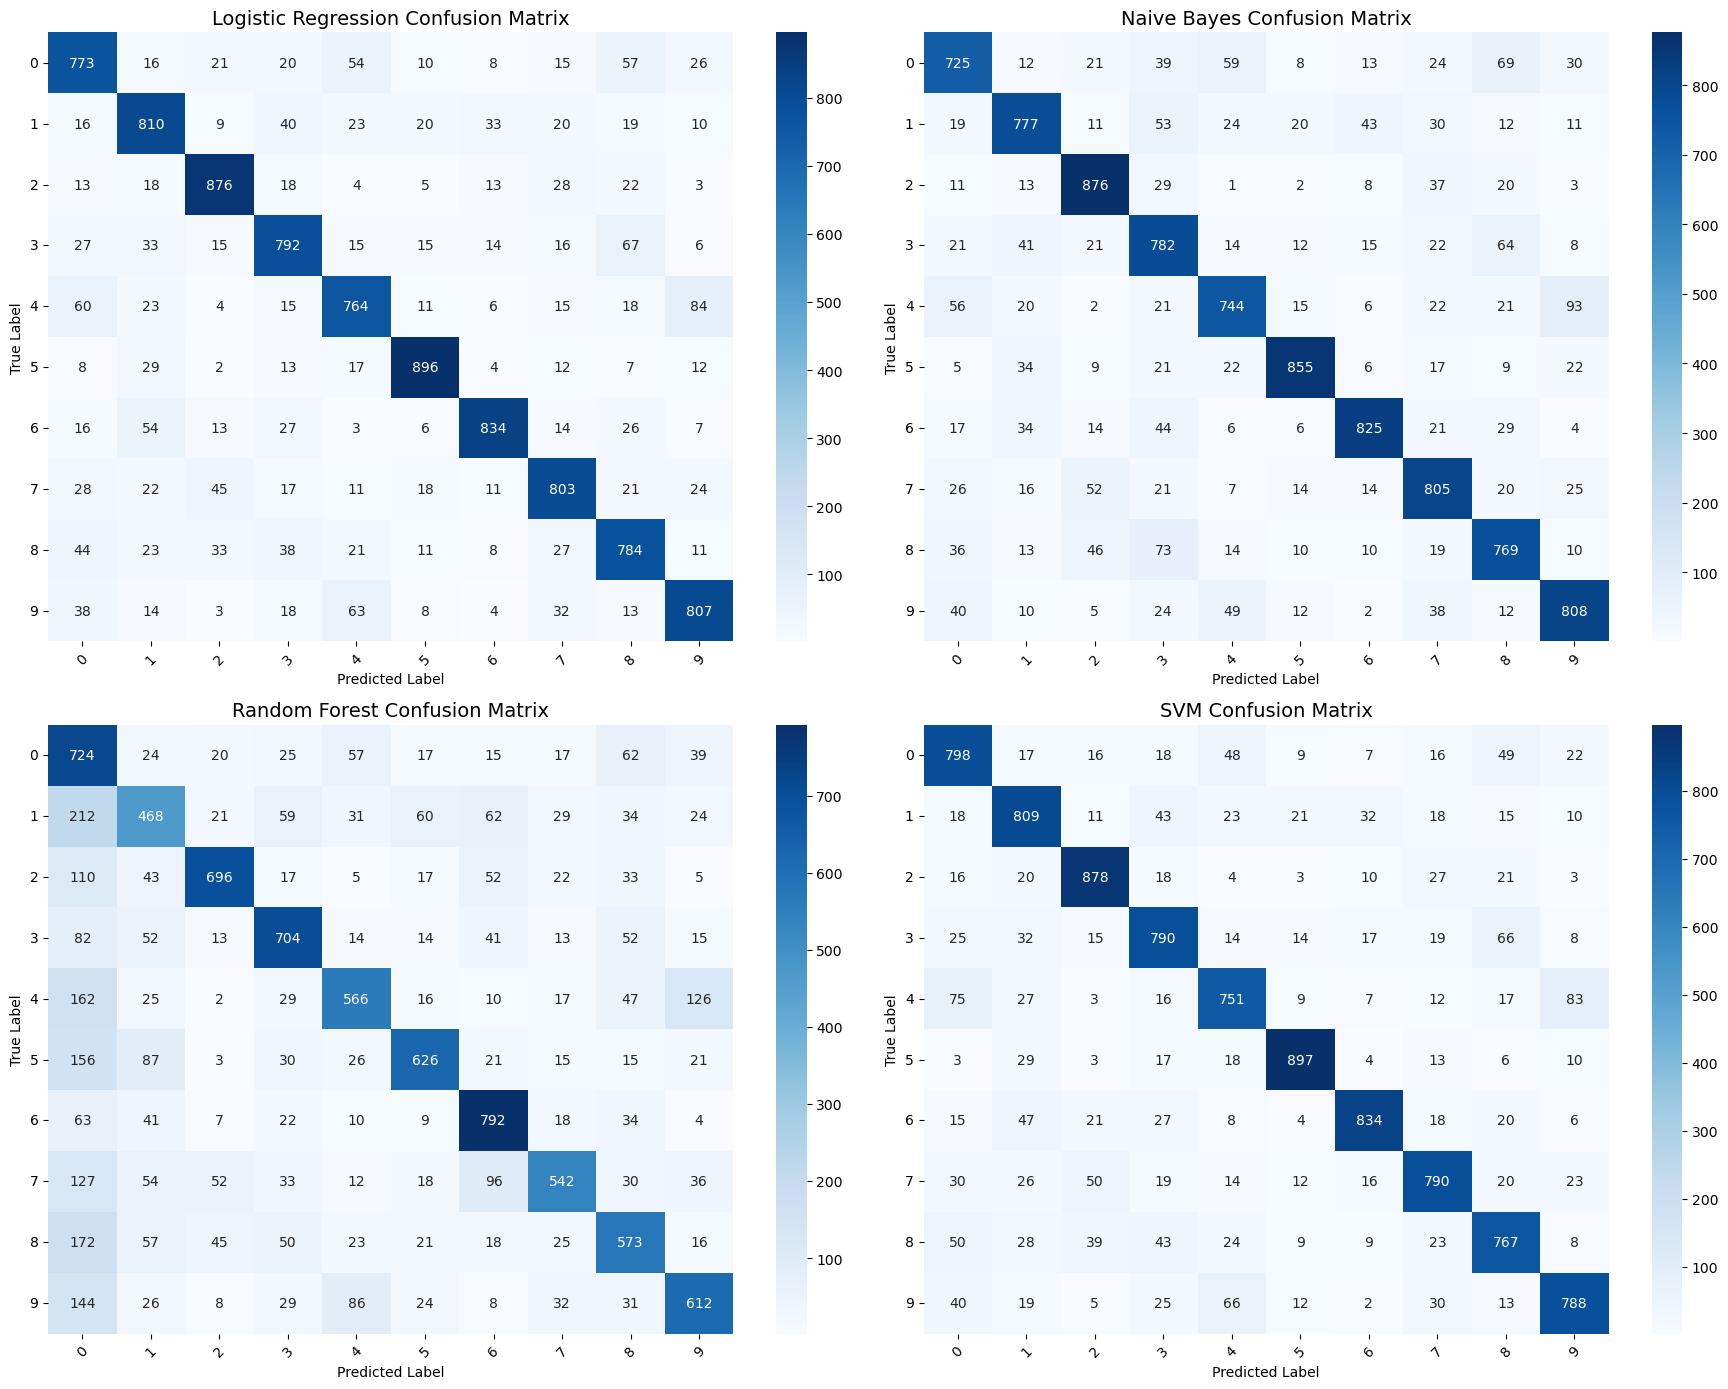

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
y_pred_logreg = best_logreg_model.predict(X_test_tfidf)
y_pred_nb = best_nb_model.predict(X_test_tfidf)
y_pred_rf = best_rf_model.predict(X_test_tfidf)
y_pred_svm = best_svm_model.predict(X_test_tfidf)

# Confusion matrices
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
model_titles = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM']
conf_matrices = [cm_logreg, cm_nb, cm_rf, cm_svm]
predictions = [y_pred_logreg, y_pred_nb, y_pred_rf, y_pred_svm]
axes = axes.flatten()

for i, cm in enumerate(conf_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model_titles[i]} Confusion Matrix', fontsize=14)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


<h1>BAR CHART COMPARISON (accuracy, precision, recall, F1-score)</h1>

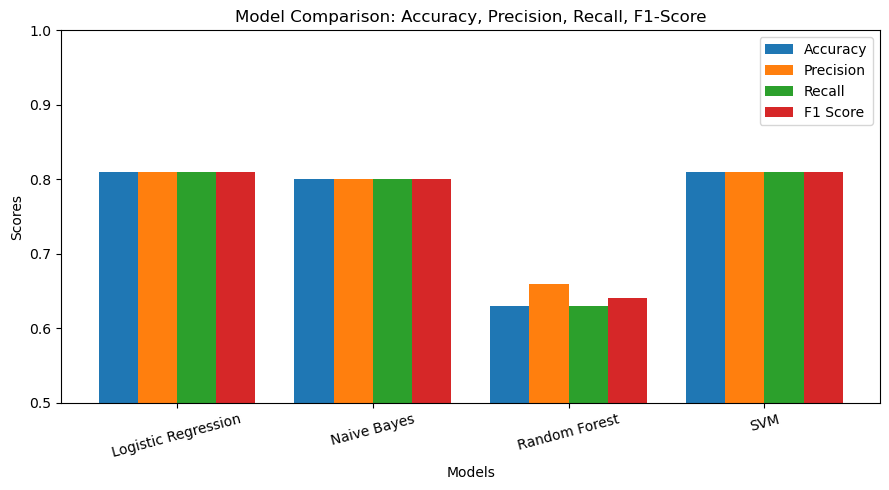

In [60]:
import matplotlib.pyplot as plt
import numpy as np

#model names 
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM']

#metric values from the classification report (average values)
accuracy = [0.81, 0.80, 0.63, 0.81]
precision = [0.81, 0.80, 0.66, 0.81]
recall = [0.81, 0.80, 0.63, 0.81]
f1_score = [0.81, 0.80, 0.64, 0.81]

#bar positioning
x = np.arange(len(models))
width = 0.2

#plotting the bar chart
plt.figure(figsize=(9, 5))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1_score, width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1-Score')
plt.xticks(x, models, rotation=15)
plt.ylim(0.5, 1.0)
plt.legend()
plt.tight_layout()
plt.show()


<h1>Performance Analysis and Insights</h1>

### 1) **Logistic Regression:**
- **Accuracy:** 0.81  
- **Precision:** 0.81  
- **Recall:** 0.81  
- **F1-score:** 0.81  

**Insight:**  
The Logistic Regression model achieved solid performance across all metrics, with particularly strong results for categories like *Sports* (0.90 for both precision and recall). The precision, recall, and F1-scores are well-balanced, indicating consistent performance across different categories.

**Confusion Matrix:**  
Reveals a relatively good distribution of correctly classified instances, with only a few misclassifications, mainly within the *Business*, *Politics*, and *World News* categories.

---

### 2) **Naive Bayes:**
- **Accuracy:** 0.80  
- **Precision:** 0.80  
- **Recall:** 0.80  
- **F1-score:** 0.80  

**Insight:**  
Naive Bayes performs similarly to Logistic Regression, though slightly lower across the board. While fast and efficient, it may miss some nuance in the data, especially in categories like *Business* and *Politics*, where recall is lower.

**Confusion Matrix:**  
Misclassifications are more spread out across categories, especially for *Business* and *Entertainment*, where false positive counts are higher.

---

### 3) **Random Forest:**
- **Accuracy:** 0.63  
- **Precision:** 0.66  
- **Recall:** 0.63  
- **F1-score:** 0.64  

**Insight:**  
Random Forest significantly underperforms compared to the other models. The low precision, recall, and F1-score suggest that it struggles to generalize well, particularly in diverse categories like *Entertainment* and *Politics*.

**Confusion Matrix:**  
Reveals a substantial number of misclassifications, especially in *Business*, *Entertainment*, and *Politics*, where both false negatives and false positives are high. The model appears overly sensitive to certain categories and fails to distinguish effectively between them.

---

### 4) **Support Vector Machine (SVM):**
- **Accuracy:** 0.81  
- **Precision:** 0.81  
- **Recall:** 0.81  
- **F1-score:** 0.81  

**Insight:**  
SVM delivers performance identical to Logistic Regression, with balanced and high scores across all metrics. It particularly excels in *Sports*, with a precision of 0.91.

**Confusion Matrix:**  
Favorable overall, with fewer misclassifications and better generalization than Random Forest, particularly in categories like *World News* and *Sports*.


<h1>Model Selection</h1>

**Based on the evaluation metrics, Logistic Regression emerges as the most balanced and reliable model for future prediction tasks.**

---

### **Key Metrics Consideration:**
Logistic Regression and SVM both achieved an accuracy of **0.81**, demonstrating strong performance. However, Logistic Regression distinguishes itself through:
- **Computational efficiency**
- **Interpretability**
- **Consistency in performance**

Its **F1-score of 0.81** reflects a balanced trade-off between precision and recall across all categories.

---

### **Why Logistic Regression?**

- **Efficiency:**  
  Logistic Regression is computationally more efficient than models like Random Forest, making it suitable for high-dimensional datasets.

- **Interpretability:**  
  It offers clear insights into model behavior through feature weights, aiding in debugging and fine-tuning.

- **Generalization:**  
  Logistic Regression handles sparse and high-dimensional data effectively, and generalizes better than Random Forest in this context.

---

**Final Verdict:**  
Given its excellent performance across key metrics (accuracy, precision, recall, and F1-score), **Logistic Regression** is chosen for future predictions. It offers the best combination of **accuracy, efficiency**, and **interpretability**, making it the most suitable candidate for deployment in production.




<span style="font-size: 38px; color: blue; font-weight: bold;">PREDICTION CLASS</span>

In [65]:
import re
import numpy as np
import string
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from scipy.sparse import hstack

class NewsCategoryPredictor:
    
    def __init__(self, model, tfidf_vectorizer, stop_words, lemmatizer):
        self.model = model
        self.tfidf_vectorizer = tfidf_vectorizer
        self.stop_words = stop_words
        self.lemmatizer = lemmatizer

    #clean and combine headline, short_description, and keywords
    def clean_and_combine(self, headline, short_description, keywords):
        def clean(text):
            if not isinstance(text, str):
                return ''
            text = BeautifulSoup(text, "html.parser").get_text()
            text = text.lower().replace('-', ' ')
            text = re.sub(r'[^a-z\s]', '', text)
            return text.strip()
        
        headline = clean(headline)
        short_description = clean(short_description)
        keywords = clean(keywords)
        return f"{headline} {short_description} {keywords}"

    #preprocess combined text (tokenization, stopword removal, lemmatization)
    def preprocess_text(self, text):
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(word.lower()) 
                  for word in tokens if word not in self.stop_words and word not in string.punctuation]
        return ' '.join(tokens)

    #predict the category using trained logistic regression model
    def predict(self, headline, short_description, keywords):
        combined = self.clean_and_combine(headline, short_description, keywords)
        processed = self.preprocess_text(combined)
        tfidf_features = self.tfidf_vectorizer.transform([processed])
        prediction = self.model.predict(tfidf_features)
        return prediction[0]

    #take user input 
    def run(self):
        print("Enter news details (type 'exit' to stop):")
        while True:
            headline = input("Headline: ")
            if headline.strip().lower() == "exit":
                print("Exiting category predictor.")
                break
            short_description = input("Short Description: ")
            keywords = input("Keywords: ")
            category = self.predict(headline, short_description, keywords)
            print(f"Predicted Category: {category}\n")


predictor = NewsCategoryPredictor(model=best_logreg_model, tfidf_vectorizer=tfidf, stop_words=stop_words, lemmatizer=lemmatizer)
predictor.run()


Enter news details (type 'exit' to stop):


Headline:  143 Miles in 35 Days: Lessons Learned
Short Description:  Resting is part of training. I've confirmed what every expert says: take your rest days.
Keywords:  running-lessons


Predicted Category: WELLNESS



Headline:  Global Markets Rally As Tech Stocks Surge
Short Description:  A strong earnings report from major tech firms lifted global indices, signaling renewed investor optimism.
Keywords:  tech-stocks-earnings-markets


Predicted Category: BUSINESS



Headline:  Earthquake Strikes Turkey, Rescue Efforts Underway
Short Description:  exit
Keywords:  hello


Predicted Category: WORLD NEWS



Headline:  exit


Exiting category predictor.


In [68]:
import re
import numpy as np
import string
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from scipy.sparse import hstack

class NewsCategoryPredictor:
    
    def __init__(self, model, tfidf_vectorizer, stop_words, lemmatizer):
        self.model = model
        self.tfidf_vectorizer = tfidf_vectorizer
        self.stop_words = stop_words
        self.lemmatizer = lemmatizer

    # Step 1: Clean the entire article
    def clean_text(self, article):
        if not isinstance(article, str):
            return ''
        article = BeautifulSoup(article, "html.parser").get_text()
        article = article.lower().replace('-', ' ')
        article = re.sub(r'[^a-z\s]', '', article)
        return article.strip()

    # Step 2: Preprocess combined article (tokenization, stopword removal, lemmatization)
    def preprocess_text(self, text):
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(word.lower()) 
                  for word in tokens if word not in self.stop_words and word not in string.punctuation]
        return ' '.join(tokens)

    # Step 3: Predict the category for the full article
    def predict(self, article):
        cleaned_article = self.clean_text(article)
        processed_article = self.preprocess_text(cleaned_article)
        tfidf_features = self.tfidf_vectorizer.transform([processed_article])
        prediction = self.model.predict(tfidf_features)
        return prediction[0]

    # Step 4: Run interaction, taking full article as input
    def run(self):
        print("Enter the full news article including the headline. Suggest keywords if you wish.(type 'exit' to stop):")
        while True:
            article = input("Article: ")
            if article.strip().lower() == "exit":
                print("Exiting category predictor.")
                break
            category = self.predict(article)
            print(f"Predicted Category: {category}\n")


# Example of initializing the class and running the prediction
predictor = NewsCategoryPredictor(model=best_logreg_model, tfidf_vectorizer=tfidf, stop_words=stop_words, lemmatizer=lemmatizer)
predictor.run()


Enter the full news article including the headline. Suggest keywords if you wish.(type 'exit' to stop):


Article:  Global Markets Rally As Tech Stocks Surge. A strong earnings report from major tech firms lifted global indices, signaling renewed investor optimism. tech-stocks-earnings-markets


Predicted Category: BUSINESS



Article:  Earthquake Strikes Turkey, Rescue Efforts Underway. Emergency teams race to find survivors after a 6.8 magnitude quake shakes eastern Turkey. turkey-earthquake-rescue-response


Predicted Category: WORLD NEWS



Article:  Serena Williams Advances To Wimbledon Final. The tennis legend defeats her semifinal opponent in straight sets to reach yet another Grand Slam final. serena-williams-wimbledon-tennis


Predicted Category: SPORTS



Article:  5 Fall Outfits That Blend Comfort and Chic. These seasonal essentials are perfect for layering while keeping your look polished. fall-fashion-style-guide


Predicted Category: STYLE & BEAUTY



Article:  How To Make The Ultimate Veggie Lasagna. A step-by-step guide to building a hearty, flavorful lasagna with layers of roasted vegetables and cheese. veggie-lasagna-cooking-recipe


Predicted Category: FOOD & DRINK



Article:  Exploring Iceland’s Hidden Hot Springs. From remote geothermal pools to quiet riverside tubs, discover Iceland’s most tranquil escapes. iceland-hot-springs-travel


Predicted Category: TRAVEL



Article:  Why Kids Thrive On Routines — And How To Build One. Experts say predictable schedules support emotional well-being and improve sleep. parenting-routines-kids-sleep


Predicted Category: PARENTING



Article:  exit


Exiting category predictor.


<h1>Prediction Class: Methodology</h1>

### 1) **Initialization (__init__)**  
The class is initialized with a trained model (`model`), a TF-IDF vectorizer (`tfidf_vectorizer`), a set of stopwords (`stop_words`), and a lemmatizer (`lemmatizer`). These components are essential for transforming the text input, making predictions, and enhancing the overall accuracy of the model.

### 2) **Text Cleaning (clean_text)**  
This method accepts the entire article (including the headline). It:  
- Converts the text to lowercase.  
- Removes HTML tags using BeautifulSoup.  
- Replaces hyphens with spaces.  
- Removes any non-alphabetic characters.  
- Returns the cleaned, well-formatted text.

### 3) **Text Preprocessing (preprocess_text)**  
After cleaning the text, this method:  
- Tokenizes the cleaned text.  
- Removes stopwords and punctuation.  
- Lemmatizes each token (word) to get its root form.  
- Returns the processed, lemmatized tokens as a string.

### 4) **Category Prediction (predict)**  
The `predict` method:  
- Takes the full article as input.  
- Cleans and preprocesses the article.  
- Transforms the processed text into a TF-IDF feature vector using the pre-trained `tfidf_vectorizer`.  
- Passes the features into the pre-trained model to predict the article’s category.  
- Returns the predicted category.

### 5) **Interactive Input (run)**  
This method provides a command-line interface for the user to input a full news article. The user is prompted to input the article (headline included). The model predicts and prints the article's category until the user types "exit" to end the session.


<h1>Prediction Class: Insights</h1>

### Strengths:

#### 1) **Simplified Input Process**  
The class allows the user to input the full article (including headline) at once, making it easier and more intuitive for users, compared to breaking the input into separate components (e.g., headline, description, and keywords).

#### 2) **Efficient Text Preprocessing**  
The combination of cleaning and preprocessing (including tokenization, stopword removal, and lemmatization) ensures that the model receives well-processed and meaningful input for predictions.

#### 3) **Flexibility**  
The class is flexible enough to handle a variety of article formats, as it processes the entire text without requiring predefined structures like headline or keywords.

#### 4) **Interactive Feedback**  
The `run()` method provides a user-friendly interface for real-time predictions, which is great for interactive and quick usage.

---

### Limitations:

#### 1) **Model Dependence on Preprocessing**  
The accuracy of predictions heavily relies on the quality of text preprocessing (cleaning, lemmatization, etc.). If the input text deviates significantly from what the model was trained on, the performance might degrade.

#### 2) **Lack of Contextual Understanding**  
The model doesn't account for the context in which certain terms are used (e.g., sarcasm, ambiguity). If the article contains words with multiple meanings, the model might not interpret them accurately.

#### 3) **Scalability Issues with Larger Texts**  
Processing longer articles with the current model might take more time and resources, especially if the text length is much greater than what the model was trained on.

#### 4) **No Keyword Extraction**  
While keywords are suggested to the user, the class doesn’t internally process or extract keywords from the article. A more advanced version could include keyword extraction as an additional feature to further refine predictions.
